# Neusmerjeni grafi nižjih redov

In [ ]:
# Preverimo, če je graf željene oblike
def laplacian_integer_graph(G):
    laplace = G.laplacian_matrix()  # Laplaceova matrika
    eigenvalues = laplace.eigenvalues()  # Lastne vrednosti
    return all(lv.is_integer() for lv in eigenvalues)


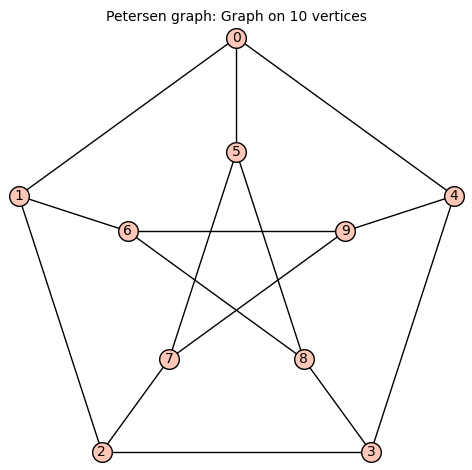

In [14]:
G = graphs.PetersenGraph()
G


In [50]:
# Generiramo grafe z natanko enim ciklom
#def unicycle(n):


In [25]:
import networkx as nx

def generate_graphs_with_one_cycle(n):
    graphs = []

    for k in range(3, n + 1):
        cycle_graph = nx.cycle_graph(k)  # Creating a cycle graph with k nodes
        remaining_nodes = list(range(k, n))

        # Generating edges for trees or isolated nodes without introducing cycles
        for tree_edges in combinations(product(range(k), remaining_nodes), n - k):
            full_graph = cycle_graph.copy()  # Copying the cycle graph
            full_graph.add_edges_from(tree_edges)  # Adding edges

            if full_graph.number_of_edges() == n:  # Checking the number of edges
                if len(list(nx.cycle_basis(full_graph))) == 1:  # Ensuring there's exactly one cycle
                    is_isomorphic = any(nx.is_isomorphic(full_graph, g) for g in graphs)  # Checking for uniqueness
                    if not is_isomorphic:
                        graphs.append(full_graph)  # Storing the unique graph

    return graphs


In [26]:
n = 6
graphs_with_one_cycle = generate_graphs_with_one_cycle(n)

# Display the generated graphs
for i, graph in enumerate(graphs_with_one_cycle):
    print(f"Graph {i + 1}:")
    print("Edges:", graph.edges())

Graph 1:
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2)]
Graph 2:
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5)]
Graph 3:
Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 5)]
Graph 4:
Edges: [(0, 1), (0, 3), (0, 4), (0, 5), (1, 2), (2, 3)]
Graph 5:
Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (1, 5), (2, 3)]
Graph 6:
Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (2, 3), (2, 5)]
Graph 7:
Edges: [(0, 1), (0, 4), (0, 5), (1, 2), (2, 3), (3, 4)]
Graph 8:
Edges: [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]


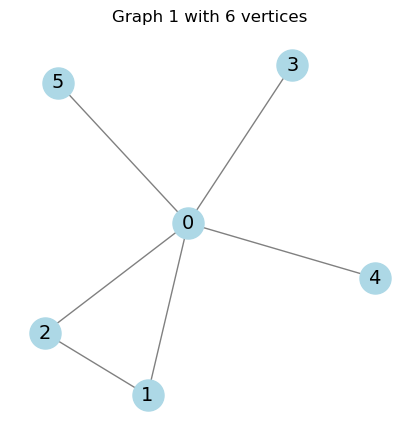

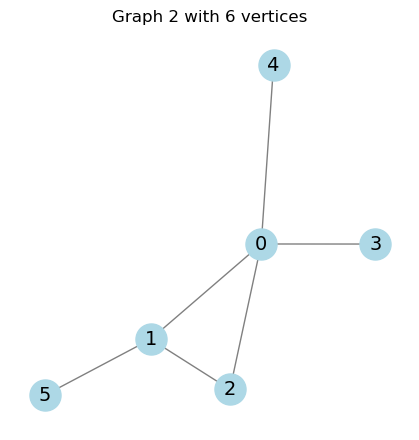

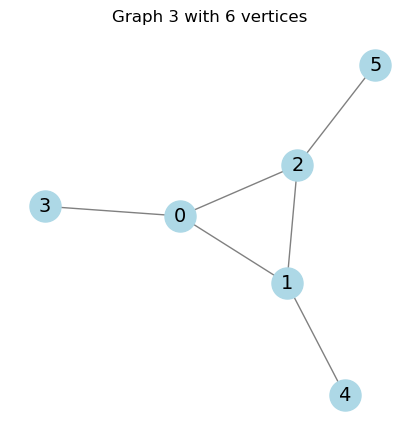

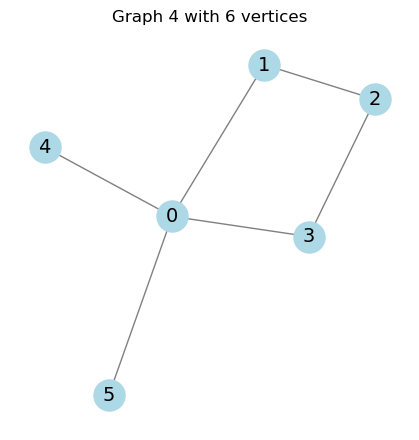

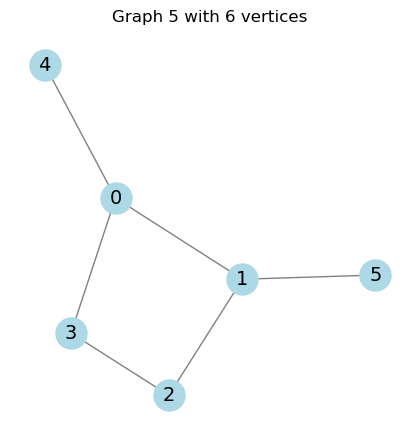

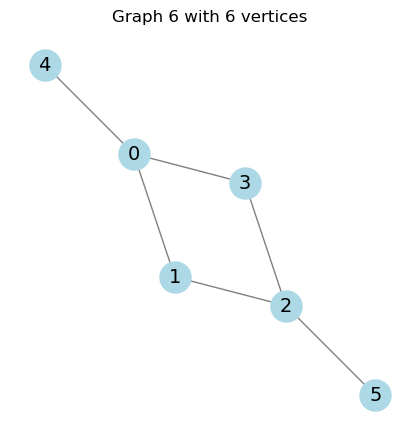

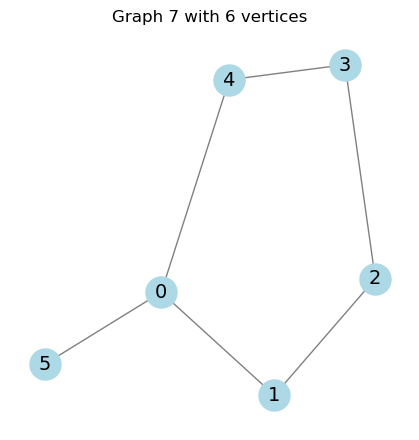

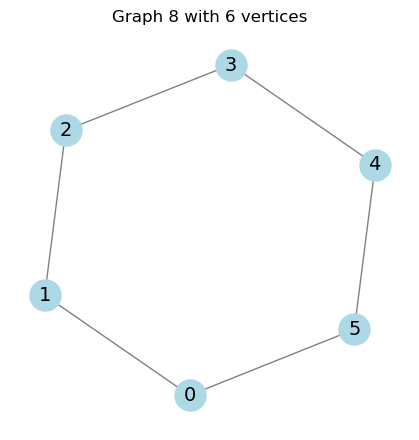

In [52]:
# Plot each unique graph
for i, graph in enumerate(graphs):
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(graph)  # Positioning layout for clarity
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=14)
    plt.title(f"Graph {i + 1} with {n} vertices")
    plt.show()

In [75]:
def graphs_to_edge_lists(graphs):
    return [list(graph.edges()) for graph in graphs]

# Example usage
n = 6  # Number of vertices
graphs = generate_graphs_with_one_cycle(n)  # Generate graph objects
G = graphs_to_edge_lists(graphs)  # Convert to a list of edge lists

# Output the list of edges
G


[[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2)],
 [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 5)],
 [(0, 1), (0, 3), (0, 4), (0, 5), (1, 2), (2, 3)],
 [(0, 1), (0, 3), (0, 4), (1, 2), (1, 5), (2, 3)],
 [(0, 1), (0, 3), (0, 4), (1, 2), (2, 3), (2, 5)],
 [(0, 1), (0, 4), (0, 5), (1, 2), (2, 3), (3, 4)],
 [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]]

In [66]:
def plot_graphs_from_edge_lists(edge_lists):
    for i, edges in enumerate(edge_lists):
        # Create a new graph from the edge list
        graph = nx.Graph()
        graph.add_edges_from(edges)
        
        # Plot the graph
        plt.figure(figsize=(4, 4))
        pos = nx.spring_layout(graph)  # Positioning layout for clarity
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=14)
        plt.title(f"Graph {i + 1} with {graph.number_of_nodes()} vertices")
        plt.show()


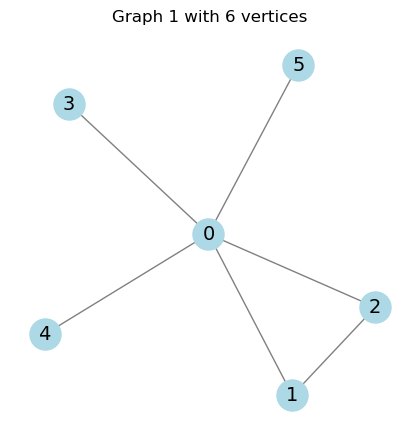

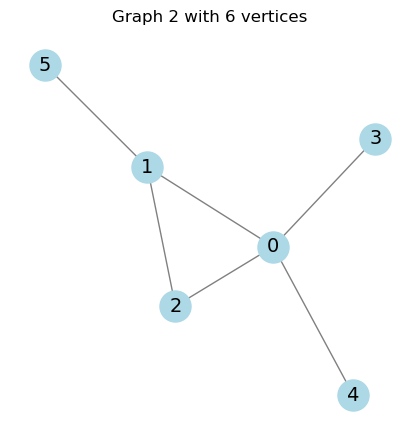

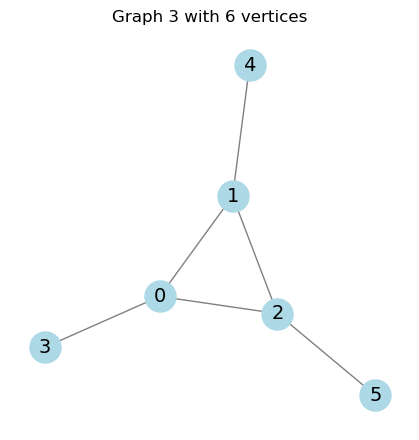

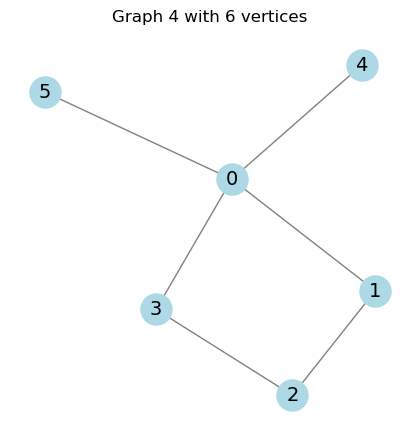

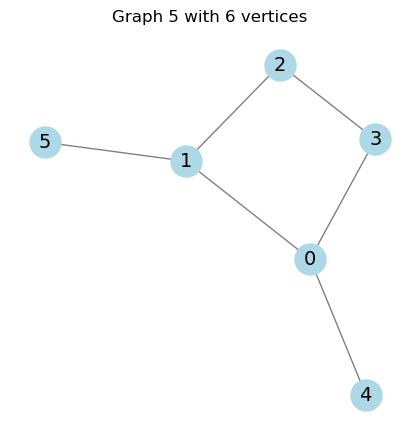

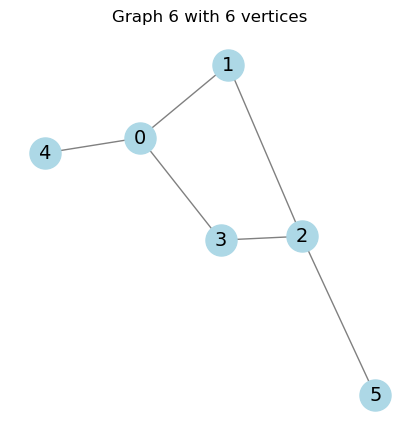

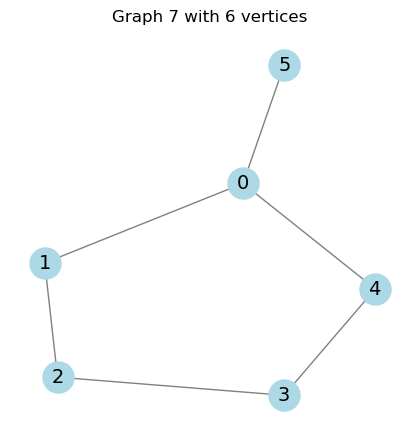

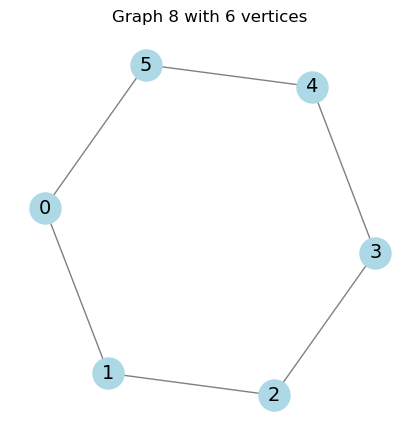

In [67]:
plot_graphs_from_edge_lists(G)

In [79]:
def verify_single_cycle_and_laplacian(edge_lists, laplacian_integer_graph):
    results = []
    for i, edges in enumerate(edge_lists):
        # Create a new graph from the edge list
        graph = nx.Graph()
        graph.add_edges_from(edges)
        
        # Check if the graph has exactly one cycle
        has_one_cycle = len(list(nx.cycle_basis(graph))) == 1
        
        # Check if the graph is Laplacian
        is_laplacian_graph = laplacian_integer_graph(graph)

        # Append results as a tuple (graph_index, has_one_cycle, is_laplacian)
        results.append((i, has_one_cycle, is_laplacian_graph))

        # Print out the results for this graph
        print(f"Graph {i}: Has One Cycle = {has_one_cycle}, Laplacian = {is_laplacian_graph}")

    return results

# Example usage
n = 6  # Set the number of vertices
graphs = generate_graphs_with_one_cycle(n)  # Generate graph objects
G = graphs_to_edge_lists(graphs)  # Convert to a list of edge lists

# Verify single cycle and Laplacian property for each graph
results = verify_single_cycle_and_laplacian(G, laplacian_integer_graph)

# Output results
results

AttributeError: 'Graph' object has no attribute 'laplacian_matrix'